# WEB SCRAPING

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [65]:
import requests

In [66]:
url = "https://www.magicbricks.com/property-for-rent/residential-paying-guest?city=2060"
response = requests.get(url)
print(response)

<Response [200]>


In [67]:
request_header = {"Content-Type" : "text/html; charset=UTF-8",
                 "User-Agent" : "Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0",
                 "Accept-Encoding" : "gzip, deflate, br"}
page=requests.get(url,headers=request_header)
page

<Response [200]>

In [68]:
from bs4 import BeautifulSoup

In [69]:
soup = BeautifulSoup(page.text, "html.parser")
soup.text

"\n1110 PG in Hyderabad - Boys & Girls Paying Guest in HyderabadBuy Popular Apartment SearchesApartments in BangaloreApartments in PuneApartments in ChennaiApartments in HyderabadApartments in MumbaiApartments in New DelhiApartments in KolkataApartments in AhmedabadApartments in NoidaApartments in GurgaonPopular House SearchesHouse in BangaloreHouse in HyderabadHouse in ChennaiHouse in New DelhiHouse in PuneHouse in CoimbatoreHouse in KolkataHouse in AhmedabadHouse in LucknowHouse in GurgaonPopular Plot SearchesPlots in BangalorePlots in HyderabadPlots in PunePlots in ChennaiPlots in KolkataPlots in LucknowPlots in GurgaonPlots in New DelhiView MoreRent Popular Apartment SearchesApartments for rent in MumbaiApartments for rent in BangaloreApartments for rent in New DelhiApartments for rent in PuneApartments for rent in HyderabadApartments for rent in ChennaiApartments for rent in GurgaonApartments for rent in NoidaApartments for rent in KolkataApartments for rent in Navi MumbaiPopular 

In [70]:
elem_with_classes=soup.find_all(class_=True)
unique_classes = set()
for elem in elem_with_classes:
    unique_classes.update(elem["class"])
unique_classes

{'LastUpdated',
 'SRBanList',
 'SRCardList',
 'SRFilter',
 'SRHeading',
 'SRHeadingPar',
 'SRListing',
 'SRmTab',
 '_j-sortevent',
 'ac',
 'acNSR',
 'active',
 'adviceDrop',
 'agentRatingPopupGrey',
 'agent__bell',
 'agentsticky',
 'alert-box',
 'ancorLink',
 'animated',
 'apple-store',
 'autosuggest',
 'autosuggestwrap',
 'autowidth',
 'average',
 'bad',
 'badge',
 'bearByBlock',
 'blogDrop',
 'body_cover_mask',
 'brandNewGrade2',
 'brandSwiper',
 'brdCrumbOpt',
 'browseBrands',
 'browseBrands__heading',
 'browseBrands__inner',
 'browseBrands__slider',
 'btn-viewOnMap',
 'btn-viewOnMap__icon',
 'bubble',
 'budgetMax',
 'budgetMaxNSR',
 'budgetMin',
 'budgetMinNSR',
 'budgetRefineShowMore',
 'buyDrop',
 'buyRentInput',
 'buyRentList',
 'buyerDBLink',
 'buyerLink',
 'buyerStrip',
 'carotIcon',
 'childBuyerLink',
 'city',
 'cityLocProjectField',
 'clear',
 'clearAll',
 'clearfix',
 'clicked',
 'closeMask',
 'closepopupIcon',
 'col-sm-12',
 'col-sm-2',
 'col-sm-3',
 'col-sm-6',
 'col_5_pl

In [71]:
for i in soup.find_all("div", class_="m-srp-card__container"):
    print(i.text)

Boys₹8,000 OnwardsFood IncludedBeds Available SPG/Paying Guest Men's PG/Paying Guest  in Madhapur Single Room With AC ₹27,000  Twin Sharing With AC ₹28,000  Triple Sharing With AC ₹10,000  Four Sharing With AC ₹8,000 Located in prime area with good facilities Wifi AvailableAC AvailableFood Available+13 More Move into SPG Mens PG, a professionally managed PG home in the Madhapur, Hyderabad. Located in a safe neighborhood, this male PG offers various modern amenities for your comfort, such as TV, AC, Food, Power Backup, Wi-Fi etc. This PG has single, double, triple, four occupancy types. This PG is nearby major commercial and educational hubs. Please contact the seller to book this fast selling high in demand PG stay.  Read More  View Phone No.  Contact Owner view on map
 +20 Photos Boys₹8,000 OnwardsFood IncludedBeds Available Manjula Luxury PG/Paying Guest For MEN'S  in Gowlidoddy Single Room ₹18,000  Twin Sharing ₹10,000  Triple Sharing ₹8,000 AC Prices are Different , Located Near to

In [72]:
name = []
for i in soup.find_all("div", class_="m-srp-card__container"):
    t = i.find("span", class_="m-srp-card__title__name")
    if t:
        name.append(t.text.strip())
    else:
        name.append(np.nan)
name

["SPG/Paying Guest Men's PG/Paying Guest",
 "Manjula Luxury PG/Paying Guest For MEN'S",
 'ASIAN LIVING PREMIUM STUDIO ROOMS PG/Paying Guest',
 'SRAVANI LUXURY WOMENS PG/Paying Guest AND HOSTEL',
 'Sugathi Hometel PG/Paying Guest For Women',
 "MS Comforts Women's PG/Paying Guest",
 'ASHOK REDDY PG/Paying Guest FOR MEN',
 'SKY LINE CO LIVING PG/Paying Guest',
 'R3 ATMOS LIVE THE SWAG PG/Paying Guest',
 'SVS Co living Stays PG/Paying Guest',
 'Le bestow coliving - Bhuvan PG/Paying Guest',
 'RRR COMFORT STAY WOMENS separate building MENS And COLIVE separate building PG/Paying Guest',
 'TULASI PREMIUM CO LIVING AND GUEST ROOMS PG/Paying Guest',
 "My Spaces Luxury Men's PG/Paying Guest",
 "N GRAND MEN'S PG/Paying Guest",
 'LAKSHMI WOMENS PG/Paying Guest AND HOSTEL',
 "SAI GRAND MEN'S AND WOMEN'S CO LIVING PG/Paying Guest",
 "COZY EXECUTIVE WOMEN'S PG/Paying Guest",
 "Estay Executive Men's PG/Paying Guest",
 'Anjali Executive luxury Women s PG/Paying Guest and Guest Rooms',
 'Anupama Co-Livin

In [73]:
location = []
for i in soup.find_all("div", class_="m-srp-card__container"):
    l = i.find("div", class_ = "m-srp-card__link--nearby")
    if l:
        location.append(l.text.strip())
    else:
        location.append(np.nan)
location

['in Madhapur',
 'in Gowlidoddy',
 'in Gowlidoddy',
 'in Financial District, Nanakram Guda',
 'in Nanakaramguda',
 'in Gachibowli',
 'in Kondapur',
 'in Gachibowli',
 'in Hitex Road',
 'in Kondapur',
 'in Kondapur',
 'in Gachibowli',
 'in Kondapur',
 'in Kondapur',
 'in Kondapur',
 'in Gachibowli',
 'in Gowlidoddy',
 'in Gachibowli',
 'in Hitech City',
 'in Gachibowli',
 'in Madhapur',
 'in Madhapur',
 'in Kukatpally, NH 9',
 'in Kondapur',
 'in TNGOS Colony',
 'in Kondapur',
 'in Ayyappa Society',
 'in Kondapur',
 'in Hafeezpet, NH 9',
 'in Madhapur']

In [74]:
price_onwards = []
for i in soup.find_all("div", class_="m-srp-card__container"):
    p = i.find("div", class_="m-srp-card__price")
    if p:
        price_onwards.append(p.text)
    else:
        price_onwards.append(np.nan)
price_onwards        

['₹8,000 Onwards',
 '₹8,000 Onwards',
 '₹11,000 Onwards',
 '₹6,500 Onwards',
 '₹7,000 Onwards',
 '₹8,000 Onwards',
 '₹6,499 Onwards',
 '₹18,000 Onwards',
 '₹11,000 Onwards',
 '₹10,000 Onwards',
 '₹12,000 Onwards',
 '₹8,000 Onwards',
 '₹10,000 Onwards',
 '₹9,500 Onwards',
 '₹10,000 Onwards',
 '₹8,000 Onwards',
 '₹7,000 Onwards',
 '₹7,500 Onwards',
 '₹7,500 Onwards',
 '₹9,000 Onwards',
 '₹8,000 Onwards',
 '₹10,000 Onwards',
 '₹9,000 Onwards',
 '₹6,500 Onwards',
 '₹7,500 Onwards',
 '₹8,000 Onwards',
 '₹9,500 Onwards',
 '₹7,000 Onwards',
 '₹9,500 Onwards',
 '₹11,000 Onwards']

In [75]:
beds_available = []
for i in soup.find_all("div", class_="m-srp-card__container"):
    b = i.find("div", class_ = "m-srp-card__beds-available")
    if b :
        beds_available.append(b.text.strip())
    else :
        beds_available.append(np.nan)
beds_available

['Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available',
 'Beds Available']

In [76]:
single_sharing = []
for i in soup.find_all("div", class_="roominfo-data-parent"):
    ss= i.find("div", class_ = "roomInfo-item-value")
    if ss :
        single_sharing.append(ss.text)
    else :
        single_sharing.append(np.nan)
single_sharing

['₹27,000 ',
 '₹18,000 ',
 '₹30,000 ',
 '₹20,000 ',
 '₹16,000 ',
 '₹18,000 ',
 '₹9,000 ',
 '₹30,000 ',
 '₹28,000 ',
 '₹12,000 ',
 '₹20,000 ',
 '₹20,000 ',
 '₹24,000 ',
 '₹22,000 ',
 '₹22,000 ',
 '₹20,000 ',
 '₹22,000 ',
 '₹18,000 ',
 '₹22,000 ',
 '₹15,000 ',
 '₹24,000 ',
 '₹22,000 ',
 '₹19,000 ',
 '₹20,000 ',
 '₹16,000 ',
 '₹19,000 ',
 '₹21,000 ',
 '₹20,000 ',
 '₹26,000 ',
 '₹24,000 ']

In [77]:
twin_sharing = []
triple_sharing = []
four_sharing = []
all_room_info_items = soup.find_all("div", class_="roomInfo-item")
for item in all_room_info_items:
    value_div = item.find("div", class_="roomInfo-item-value")
    if value_div:
        text = value_div.text.strip()
        if "Twin Sharing" in item.text:
            twin_sharing.append(text)
        elif "Triple Sharing" in item.text:
            triple_sharing.append(text)
        elif "Four Sharing" in item.text:
            four_sharing.append(text)
        else:
            twin_sharing.append(np.nan)
            triple_sharing.append(np.nan)
            four_sharing.append(np.nan)

twin_sharing = twin_sharing[1:30] + [np.nan]
triple_sharing = triple_sharing[1:30] + [np.nan]
four_sharing = four_sharing[1:30] + [np.nan]

print("Twin Sharing:", twin_sharing)
print("Triple Sharing:", triple_sharing)
print("Four Sharing:", four_sharing)

Twin Sharing: ['₹28,000', nan, '₹10,000', nan, '₹15,000', nan, '₹11,000', nan, nan, '₹9,000', nan, '₹10,000', '₹9,000', nan, '₹18,000', nan, '₹15,000', '₹12,000', nan, nan, '₹15,000', nan, '₹12,500', nan, '₹14,000', nan, '₹12,000', nan, '₹12,000', nan]
Triple Sharing: ['₹10,000', nan, '₹8,000', nan, '₹11,000', nan, '₹8,500', nan, nan, '₹8,500', nan, '₹9,000', '₹7,499', nan, nan, '₹11,000', '₹10,000', nan, nan, '₹12,000', nan, '₹8,500', nan, '₹10,000', nan, '₹9,500', nan, '₹10,000', nan, nan]
Four Sharing: ['₹8,000', nan, nan, nan, '₹7,500', nan, nan, '₹7,000', nan, '₹8,000', '₹6,499', nan, nan, nan, nan, nan, '₹8,000', nan, nan, nan, nan, '₹8,000', nan, '₹7,500', nan, nan, '₹7,500', nan, '₹7,500', nan]


In [78]:
for i in [name,location,price_onwards,beds_available,single_sharing,twin_sharing,triple_sharing,four_sharing]:
    print(len(i))

30
30
30
30
30
30
30
30


In [79]:
d={"Name" : name,
   "Location":location,
   "Price":price_onwards,
   "Beds Availability":beds_available,
   "Single Sharing":single_sharing,
   "Twin Sharing":twin_sharing,
   "Triple Sharing":triple_sharing,
   "Four Sharing":four_sharing
  }

In [80]:
pg_df = pd.DataFrame(d)
pg_df

,Name,Location,Price,Beds Availability,Single Sharing,Twin Sharing,Triple Sharing,Four Sharing
0,SPG/Paying Guest Men's PG/Paying Guest,in Madhapur,"₹8,000 Onwards",Beds Available,"₹27,000","₹28,000","₹10,000","₹8,000"
1,Manjula Luxury PG/Paying Guest For MEN'S,in Gowlidoddy,"₹8,000 Onwards",Beds Available,"₹18,000",NaN,NaN,NaN
2,ASIAN LIVING PREMIUM STUDIO ROOMS PG/Paying Guest,in Gowlidoddy,"₹11,000 Onwards",Beds Available,"₹30,000","₹10,000","₹8,000",NaN
3,SRAVANI LUXURY WOMENS PG/Paying Guest AND HOSTEL,"in Financial District, Nanakram Guda","₹6,500 Onwards",Beds Available,"₹20,000",NaN,NaN,NaN
4,Sugathi Hometel PG/Paying Guest For Women,in Nanakaramguda,"₹7,000 Onwards",Beds Available,"₹16,000","₹15,000","₹11,000","₹7,500"
5,MS Comforts Women's PG/Paying Guest,in Gachibowli,"₹8,000 Onwards",Beds Available,"₹18,000",NaN,NaN,NaN
6,ASHOK REDDY PG/Paying Guest FOR MEN,in Kondapur,"₹6,499 Onwards",Beds Available,"₹9,000","₹11,000","₹8,500",NaN
7,SKY LINE CO LIVING PG/Paying Guest,in Gachibowli,"₹18,000 Onwards",Beds Available,"₹30,000",NaN,NaN,"₹7,000"
8,R3 ATMOS LIVE THE SWAG PG/Paying Guest,in Hitex Road,"₹11,000 Onwards",Beds Available,"₹28,000",NaN,NaN,NaN
9,SVS Co living Stays PG/Paying Guest,in Kondapur,"₹10,000 Onwards",Beds Available,"₹12,000","₹9,000","₹8,500","₹8,000"


### Data Frame

In [81]:
name = []
location = []
price_onwards = []
beds_available = []
single_sharing = []
twin_sharing = []
triple_sharing = []
four_sharing = []
for i in range(1,30):
    url = f"https://www.magicbricks.com/property-for-rent/residential-paying-guest?city=2060&page={i}"
    request_header = {"Content-Type" : "text/html; charset=UTF-8",
                 "User-Agent" : "Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0",
                 "Accept-Encoding" : "gzip, deflate, br"}
    page = requests.get(url, headers = request_header)
    soup = BeautifulSoup(page.text)
    for i in soup.find_all("div", class_="m-srp-card__container"):
        t = i.find("span", class_="m-srp-card__title__name")
        if t:
            name.append(t.text.strip())
        else:
            name.append(np.nan)
        l = i.find("div", class_ = "m-srp-card__link--nearby")
        if l:
           location.append(l.text)
        else:
           location.append(np.nan)
        p = i.find("div", class_="m-srp-card__price")
        if p:
            price_onwards.append(p.text)
        else:
            price_onwards.append(np.nan)
        b = i.find("div", class_ = "m-srp-card__beds-available")
        if b :
            beds_available.append(b.text)
        else :
            beds_available.append(np.nan)

    for i in soup.find_all("div", class_="roominfo-data-parent"):
        ss= i.find("div", class_ = "roomInfo-item-value")
        if ss :
            single_sharing.append(ss.text)
        else :
            single_sharing.append(np.nan)
    all_room_info_items = soup.find_all("div", class_="roomInfo-item")

    for item in all_room_info_items:
        value_div = item.find("div", class_="roomInfo-item-value")
        if value_div:
            text = value_div.text.strip()
            if "Twin Sharing" in item.text:
                twin_sharing.append(text)
            elif "Triple Sharing" in item.text:
                triple_sharing.append(text)
            elif "Four Sharing" in item.text:
                four_sharing.append(text)
            else:
               twin_sharing.append(np.nan)
               triple_sharing.append(np.nan)
               four_sharing.append(np.nan)
                
    twin_sharing = twin_sharing[1:870] + [np.nan]
    triple_sharing = triple_sharing[1:870] + [np.nan]
    four_sharing = four_sharing[1:870] + [np.nan]   

In [82]:
for i in [name,location,price_onwards,beds_available,single_sharing,twin_sharing,triple_sharing,four_sharing]:
    print(len(i))

870
870
870
870
870
870
870
870


In [83]:
d={"Name" : name,
   "Location":location,
   "Price":price_onwards,
   "Beds Availability":beds_available,
   "Single Sharing":single_sharing,
   "Twin Sharing":twin_sharing,
   "Triple Sharing":triple_sharing,
   "Four Sharing":four_sharing
  }

In [84]:
df = pd.DataFrame(d)
df

,Name,Location,Price,Beds Availability,Single Sharing,Twin Sharing,Triple Sharing,Four Sharing
0,SPG/Paying Guest Men's PG/Paying Guest,in Madhapur,"₹8,000 Onwards",Beds Available,"₹27,000","₹12,000",NaN,"₹7,500"
1,Manjula Luxury PG/Paying Guest For MEN'S,in Gowlidoddy,"₹8,000 Onwards",Beds Available,"₹18,000",NaN,"₹10,000",NaN
2,ASIAN LIVING PREMIUM STUDIO ROOMS PG/Paying Guest,in Gowlidoddy,"₹11,000 Onwards",Beds Available,"₹30,000","₹13,000",NaN,"₹9,000"
3,SRAVANI LUXURY WOMENS PG/Paying Guest AND HOSTEL,"in Financial District, Nanakram Guda","₹6,500 Onwards",Beds Available,"₹20,000",NaN,"₹9,000",NaN
4,Sugathi Hometel PG/Paying Guest For Women,in Nanakaramguda,"₹7,000 Onwards",Beds Available,"₹16,000","₹12,000",NaN,"₹8,000"
...,...,...,...,...,...,...,...,...
865,Indraprastha PG/Paying Guest men's hostel,in Madhapur,"₹11,100 Onwards",NaN,"₹14,300",NaN,NaN,NaN
866,Angelina men's PG/Paying Guest,"in Chhota Anjaiah Nagar, Gachibowli, Outer Ri...","₹7,500 Onwards",NaN,"₹13,000",NaN,NaN,NaN
867,Sri renuka girls delex hostel PG/Paying Guest,"in Peerzadiguda, NH 2 2","₹4,700 Onwards",NaN,"₹5,000",NaN,NaN,NaN
868,Kavyasree Men's and women's hostel PG/Paying G...,in Gachibowli,"₹7,600 Onwards",NaN,"₹9,500",NaN,NaN,NaN


In [85]:
df.shape

(870, 8)

In [87]:
df.head()

,Name,Location,Price,Beds Availability,Single Sharing,Twin Sharing,Triple Sharing,Four Sharing
0,SPG/Paying Guest Men's PG/Paying Guest,in Madhapur,"₹8,000 Onwards",Beds Available,"₹27,000","₹12,000",NaN,"₹7,500"
1,Manjula Luxury PG/Paying Guest For MEN'S,in Gowlidoddy,"₹8,000 Onwards",Beds Available,"₹18,000",NaN,"₹10,000",NaN
2,ASIAN LIVING PREMIUM STUDIO ROOMS PG/Paying Guest,in Gowlidoddy,"₹11,000 Onwards",Beds Available,"₹30,000","₹13,000",NaN,"₹9,000"
3,SRAVANI LUXURY WOMENS PG/Paying Guest AND HOSTEL,"in Financial District, Nanakram Guda","₹6,500 Onwards",Beds Available,"₹20,000",NaN,"₹9,000",NaN
4,Sugathi Hometel PG/Paying Guest For Women,in Nanakaramguda,"₹7,000 Onwards",Beds Available,"₹16,000","₹12,000",NaN,"₹8,000"


#         EXPLORATORY DATA ANALYSIS

In [88]:
df.shape

(870, 8)

In [89]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               870 non-null    object
 1   Location           870 non-null    object
 2   Price              870 non-null    object
 3   Beds Availability  94 non-null     object
 4   Single Sharing     870 non-null    object
 5   Twin Sharing       411 non-null    object
 6   Triple Sharing     364 non-null    object
 7   Four Sharing       251 non-null    object
dtypes: object(8)
memory usage: 54.5+ KB


In [90]:
df.isna().sum()

Name                   0
Location               0
Price                  0
Beds Availability    776
Single Sharing         0
Twin Sharing         459
Triple Sharing       506
Four Sharing         619
dtype: int64

In [91]:
df.describe(include="object")

,Name,Location,Price,Beds Availability,Single Sharing,Twin Sharing,Triple Sharing,Four Sharing
count,870,870,870,94,870,411,364,251
unique,763,200,199,1,107,69,56,34
top,Single Room in a 1 Bhk apartment,in Madhapur,"₹6,000 Onwards",Beds Available,"₹5,900","₹10,000","₹7,000","₹6,000"
freq,21,85,55,94,59,36,42,38


In [92]:
df.dropna(subset="Price", inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               870 non-null    object
 1   Location           870 non-null    object
 2   Price              870 non-null    object
 3   Beds Availability  94 non-null     object
 4   Single Sharing     870 non-null    object
 5   Twin Sharing       411 non-null    object
 6   Triple Sharing     364 non-null    object
 7   Four Sharing       251 non-null    object
dtypes: object(8)
memory usage: 54.5+ KB


# DATA CLEANING

### Removing Special Characters

In [94]:
# Remove '₹' and ',' from Price columns
price_columns = ['Price', 'Single Sharing', 'Twin Sharing', 'Triple Sharing', 'Four Sharing']
for col in price_columns:
    df[col] = df[col].replace('[^0-9]', "", regex = True)

In [95]:
df["Location"]=df["Location"].replace('in',"",regex=True)

In [96]:
df

,Name,Location,Price,Beds Availability,Single Sharing,Twin Sharing,Triple Sharing,Four Sharing
0,SPG/Paying Guest Men's PG/Paying Guest,Madhapur,8000,Beds Available,27000,12000,NaN,7500
1,Manjula Luxury PG/Paying Guest For MEN'S,Gowlidoddy,8000,Beds Available,18000,NaN,10000,NaN
2,ASIAN LIVING PREMIUM STUDIO ROOMS PG/Paying Guest,Gowlidoddy,11000,Beds Available,30000,13000,NaN,9000
3,SRAVANI LUXURY WOMENS PG/Paying Guest AND HOSTEL,"Fancial District, Nanakram Guda",6500,Beds Available,20000,NaN,9000,NaN
4,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,7000,Beds Available,16000,12000,NaN,8000
...,...,...,...,...,...,...,...,...
865,Indraprastha PG/Paying Guest men's hostel,Madhapur,11100,NaN,14300,NaN,NaN,NaN
866,Angelina men's PG/Paying Guest,"Chhota Anjaiah Nagar, Gachibowli, Outer Rg Road",7500,NaN,13000,NaN,NaN,NaN
867,Sri renuka girls delex hostel PG/Paying Guest,"Peerzadiguda, NH 2 2",4700,NaN,5000,NaN,NaN,NaN
868,Kavyasree Men's and women's hostel PG/Paying G...,Gachibowli,7600,NaN,9500,NaN,NaN,NaN


###  Converting Data Types

In [97]:
price_columns = ['Price', 'Single Sharing', 'Twin Sharing', 'Triple Sharing', 'Four Sharing']
for col in price_columns:
    df[col] = df[col].fillna(0).astype("int")

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               870 non-null    object
 1   Location           870 non-null    object
 2   Price              870 non-null    int32 
 3   Beds Availability  94 non-null     object
 4   Single Sharing     870 non-null    int32 
 5   Twin Sharing       870 non-null    int32 
 6   Triple Sharing     870 non-null    int32 
 7   Four Sharing       870 non-null    int32 
dtypes: int32(5), object(3)
memory usage: 37.5+ KB


# DATA MANIPULATION

### Handling Missing Values

In [99]:
df.fillna("Not Available")

,Name,Location,Price,Beds Availability,Single Sharing,Twin Sharing,Triple Sharing,Four Sharing
0,SPG/Paying Guest Men's PG/Paying Guest,Madhapur,8000,Beds Available,27000,12000,0,7500
1,Manjula Luxury PG/Paying Guest For MEN'S,Gowlidoddy,8000,Beds Available,18000,0,10000,0
2,ASIAN LIVING PREMIUM STUDIO ROOMS PG/Paying Guest,Gowlidoddy,11000,Beds Available,30000,13000,0,9000
3,SRAVANI LUXURY WOMENS PG/Paying Guest AND HOSTEL,"Fancial District, Nanakram Guda",6500,Beds Available,20000,0,9000,0
4,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,7000,Beds Available,16000,12000,0,8000
...,...,...,...,...,...,...,...,...
865,Indraprastha PG/Paying Guest men's hostel,Madhapur,11100,Not Available,14300,0,0,0
866,Angelina men's PG/Paying Guest,"Chhota Anjaiah Nagar, Gachibowli, Outer Rg Road",7500,Not Available,13000,0,0,0
867,Sri renuka girls delex hostel PG/Paying Guest,"Peerzadiguda, NH 2 2",4700,Not Available,5000,0,0,0
868,Kavyasree Men's and women's hostel PG/Paying G...,Gachibowli,7600,Not Available,9500,0,0,0


In [100]:
df.to_csv("PG.csv", index=False)

In [101]:
df

,Name,Location,Price,Beds Availability,Single Sharing,Twin Sharing,Triple Sharing,Four Sharing
0,SPG/Paying Guest Men's PG/Paying Guest,Madhapur,8000,Beds Available,27000,12000,0,7500
1,Manjula Luxury PG/Paying Guest For MEN'S,Gowlidoddy,8000,Beds Available,18000,0,10000,0
2,ASIAN LIVING PREMIUM STUDIO ROOMS PG/Paying Guest,Gowlidoddy,11000,Beds Available,30000,13000,0,9000
3,SRAVANI LUXURY WOMENS PG/Paying Guest AND HOSTEL,"Fancial District, Nanakram Guda",6500,Beds Available,20000,0,9000,0
4,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,7000,Beds Available,16000,12000,0,8000
...,...,...,...,...,...,...,...,...
865,Indraprastha PG/Paying Guest men's hostel,Madhapur,11100,NaN,14300,0,0,0
866,Angelina men's PG/Paying Guest,"Chhota Anjaiah Nagar, Gachibowli, Outer Rg Road",7500,NaN,13000,0,0,0
867,Sri renuka girls delex hostel PG/Paying Guest,"Peerzadiguda, NH 2 2",4700,NaN,5000,0,0,0
868,Kavyasree Men's and women's hostel PG/Paying G...,Gachibowli,7600,NaN,9500,0,0,0


In [102]:
df.describe(include="object")

,Name,Location,Beds Availability
count,870,870,94
unique,763,200,1
top,Single Room in a 1 Bhk apartment,Madhapur,Beds Available
freq,21,85,94


In [103]:
df.Name.value_counts()

Name
Single Room in a 1 Bhk apartment                  21
Single Room in a 3 Bhk apartment                  18
Bed in a 2 Bhk apartment                          16
Bed in a 1 Bhk apartment                          12
Bed in a 3 Bhk apartment                          12
                                                  ..
Divya Sai Executive PG/Paying Guest and Hostel     1
Prime dwelling PG/Paying Guest                     1
Central Boys Hostel PG/Paying Guest                1
GB RAJU BOYS HOSTEL PG/Paying Guest                1
Sri renuka girls hostel PG/Paying Guest            1
Name: count, Length: 763, dtype: int64

In [104]:
df.Location.value_counts()

Location
  Madhapur                       85
  Gachibowli                     71
  Ameerpet, NH 9                 64
  Kondapur                       64
  Kukatpally, NH 9               55
                                 ..
  Red Hills, Lakdikapul, NH 7     1
  Kompally                        1
  Lalitha Nagar Adikmet           1
  Nagole                          1
  Peerzadiguda, NH 2 2            1
Name: count, Length: 200, dtype: int64

In [105]:
df["Location"].unique()

array(['  Madhapur', '  Gowlidoddy', '  Fancial District, Nanakram Guda',
       '  Nanakaramguda', '  Gachibowli', '  Kondapur', '  Hitex Road',
       '  Hitech City', '  Kukatpally, NH 9', '  TNGOS Colony',
       '  Ayyappa Society', '  Hafeezpet, NH 9',
       '  Anjaiah Nagar Gachibowli', '  Kokapet, Outer Rg Road',
       '  Indira Nagar Gachibowli', '  Tukkuguda, Srisailam Highway',
       '  Siddiq Nagar Hitech City', '  Rai Durg', '  Old Alwal',
       '  Kukatpally Housg Board Colony, NH 9', '  Uppal, NH 2 2',
       '  ECIL', '  Jubilee Hills', '  Adikmet', '  LB Nagar, NH 9',
       '  Ameerpet, NH 9', '  Punjagutta, NH 9', '  Phase 2 KPHB',
       '  Phase 9 KPHB', '  Abids, NH 7', '  Adibatla',
       '  Kamalapuri Colony', '  Secunderabad',
       '  Sri Sai Nagar Madhapur', '  Begumpet', '  Miyapur Road',
       '  Pragathi Nagar, Kukatpally', '  Nallagandla Tellapur Road',
       '  Hayathnagar Khalsa', '  Gayatri Nagar Peerzadiguda',
       '  Tellapur, Outer Rg Road

# MULTIVARIATE ANALYSIS

In [106]:
location_counts = df['Location'].value_counts()
top_locations = location_counts.head(5).index.tolist()
top_locations

['  Madhapur',
 '  Gachibowli',
 '  Ameerpet, NH 9',
 '  Kondapur',
 '  Kukatpally, NH 9']

In [107]:
df_top = df[df['Location'].isin(top_locations)]
pivot_table = pd.pivot_table(df_top, values = "Price", index = "Name",
                              columns="Location",aggfunc="first")
pivot_table

Location,"Ameerpet, NH 9",Gachibowli,Kondapur,"Kukatpally, NH 9",Madhapur
Name,,,,,
3 BHK flat on sharing PG/Paying Guest,NaN,NaN,NaN,NaN,7000.0
7 Hills Men's And Women's Hostel And PG/Paying Guest,NaN,NaN,6000.0,NaN,NaN
7 Hills PG/Paying Guest,NaN,NaN,8500.0,NaN,NaN
7 Hills luxury PG/Paying Guest for women,NaN,NaN,NaN,NaN,7000.0
A S Grand PG/Paying Guest Men,NaN,NaN,NaN,NaN,7500.0
...,...,...,...,...,...
sri durga women PG/Paying Guest,NaN,8000.0,NaN,NaN,NaN
sri lakshmi ranganayaka PG/Paying Guest,NaN,NaN,NaN,5500.0,NaN
sri sai teja womens hostel PG/Paying Guest,NaN,6000.0,NaN,NaN,NaN


In [108]:
def fill_with_mode(x):
    mode_value = x.mode()
    if not mode_value.empty:
        return x.fillna(mode_value)
    else:
        global_mode = df["Location"].mode()[0]
        return "NA"

In [109]:
df["Location"] = df.groupby("Name")["Location"].transform(fill_with_mode)

In [110]:
df["Location"].unique()

array(['  Madhapur', '  Gowlidoddy', '  Fancial District, Nanakram Guda',
       '  Nanakaramguda', '  Gachibowli', '  Kondapur', '  Hitex Road',
       '  Hitech City', '  Kukatpally, NH 9', '  TNGOS Colony',
       '  Ayyappa Society', '  Hafeezpet, NH 9',
       '  Anjaiah Nagar Gachibowli', '  Kokapet, Outer Rg Road',
       '  Indira Nagar Gachibowli', '  Tukkuguda, Srisailam Highway',
       '  Siddiq Nagar Hitech City', '  Rai Durg', '  Old Alwal',
       '  Kukatpally Housg Board Colony, NH 9', '  Uppal, NH 2 2',
       '  ECIL', '  Jubilee Hills', '  Adikmet', '  LB Nagar, NH 9',
       '  Ameerpet, NH 9', '  Punjagutta, NH 9', '  Phase 2 KPHB',
       '  Phase 9 KPHB', '  Abids, NH 7', '  Adibatla',
       '  Kamalapuri Colony', '  Secunderabad',
       '  Sri Sai Nagar Madhapur', '  Begumpet', '  Miyapur Road',
       '  Pragathi Nagar, Kukatpally', '  Nallagandla Tellapur Road',
       '  Hayathnagar Khalsa', '  Gayatri Nagar Peerzadiguda',
       '  Tellapur, Outer Rg Road

In [111]:
df

,Name,Location,Price,Beds Availability,Single Sharing,Twin Sharing,Triple Sharing,Four Sharing
0,SPG/Paying Guest Men's PG/Paying Guest,Madhapur,8000,Beds Available,27000,12000,0,7500
1,Manjula Luxury PG/Paying Guest For MEN'S,Gowlidoddy,8000,Beds Available,18000,0,10000,0
2,ASIAN LIVING PREMIUM STUDIO ROOMS PG/Paying Guest,Gowlidoddy,11000,Beds Available,30000,13000,0,9000
3,SRAVANI LUXURY WOMENS PG/Paying Guest AND HOSTEL,"Fancial District, Nanakram Guda",6500,Beds Available,20000,0,9000,0
4,Sugathi Hometel PG/Paying Guest For Women,Nanakaramguda,7000,Beds Available,16000,12000,0,8000
...,...,...,...,...,...,...,...,...
865,Indraprastha PG/Paying Guest men's hostel,Madhapur,11100,NaN,14300,0,0,0
866,Angelina men's PG/Paying Guest,"Chhota Anjaiah Nagar, Gachibowli, Outer Rg Road",7500,NaN,13000,0,0,0
867,Sri renuka girls delex hostel PG/Paying Guest,"Peerzadiguda, NH 2 2",4700,NaN,5000,0,0,0
868,Kavyasree Men's and women's hostel PG/Paying G...,Gachibowli,7600,NaN,9500,0,0,0


# UNIVARIATE ANALYSIS

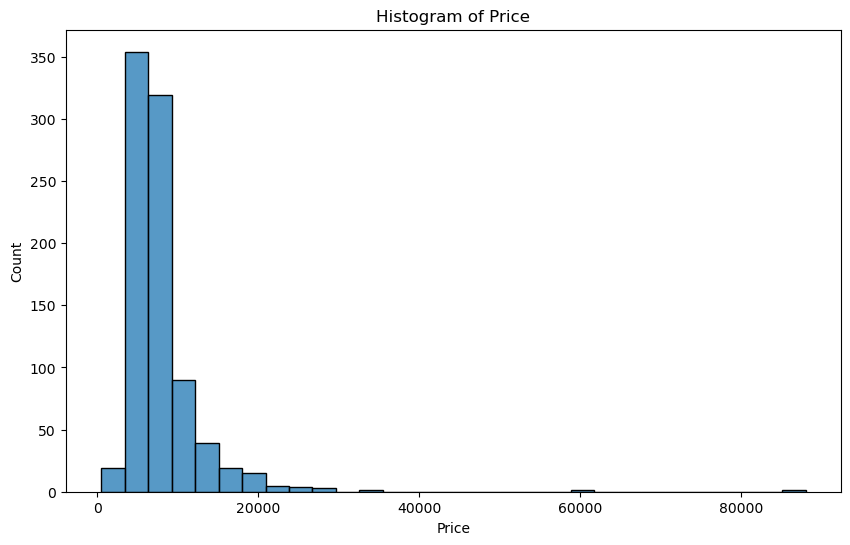

In [112]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
plt.figure(figsize=(10,6))
boxplot = sns.histplot(data = df, x ="Price", bins = 30)
plt.title("Histogram of Price")
plt.show()

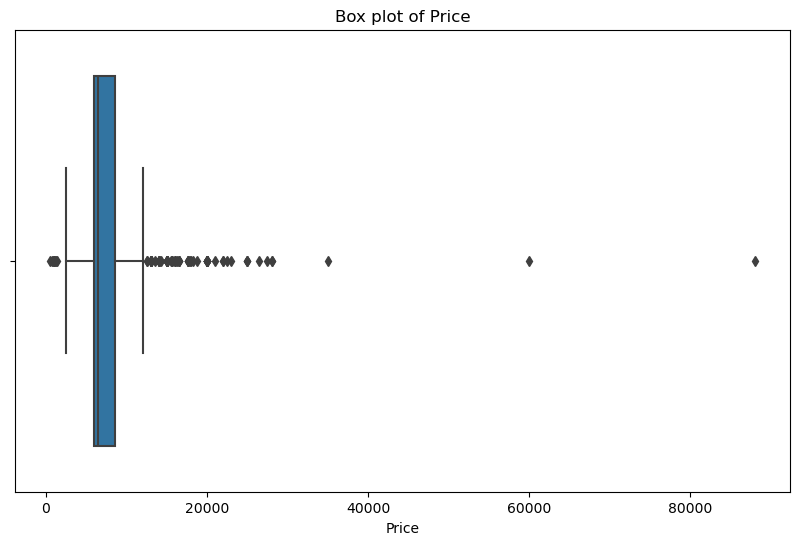

In [113]:
plt.figure(figsize=(10,6))
boxplot = sns.boxplot(x ="Price", data = df)
plt.title("Box plot of Price")
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

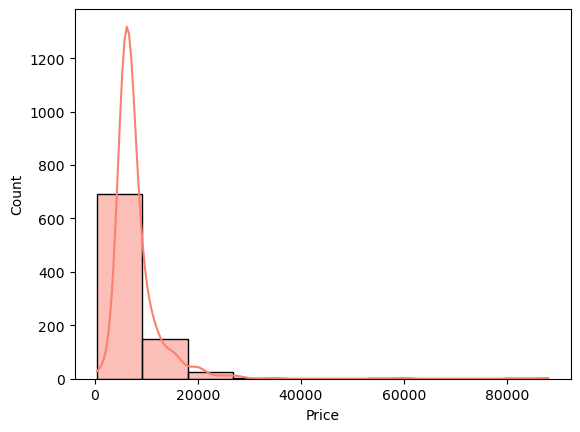

In [114]:
sns.histplot(df["Price"].dropna(), bins = 10, color = "salmon", kde= True)

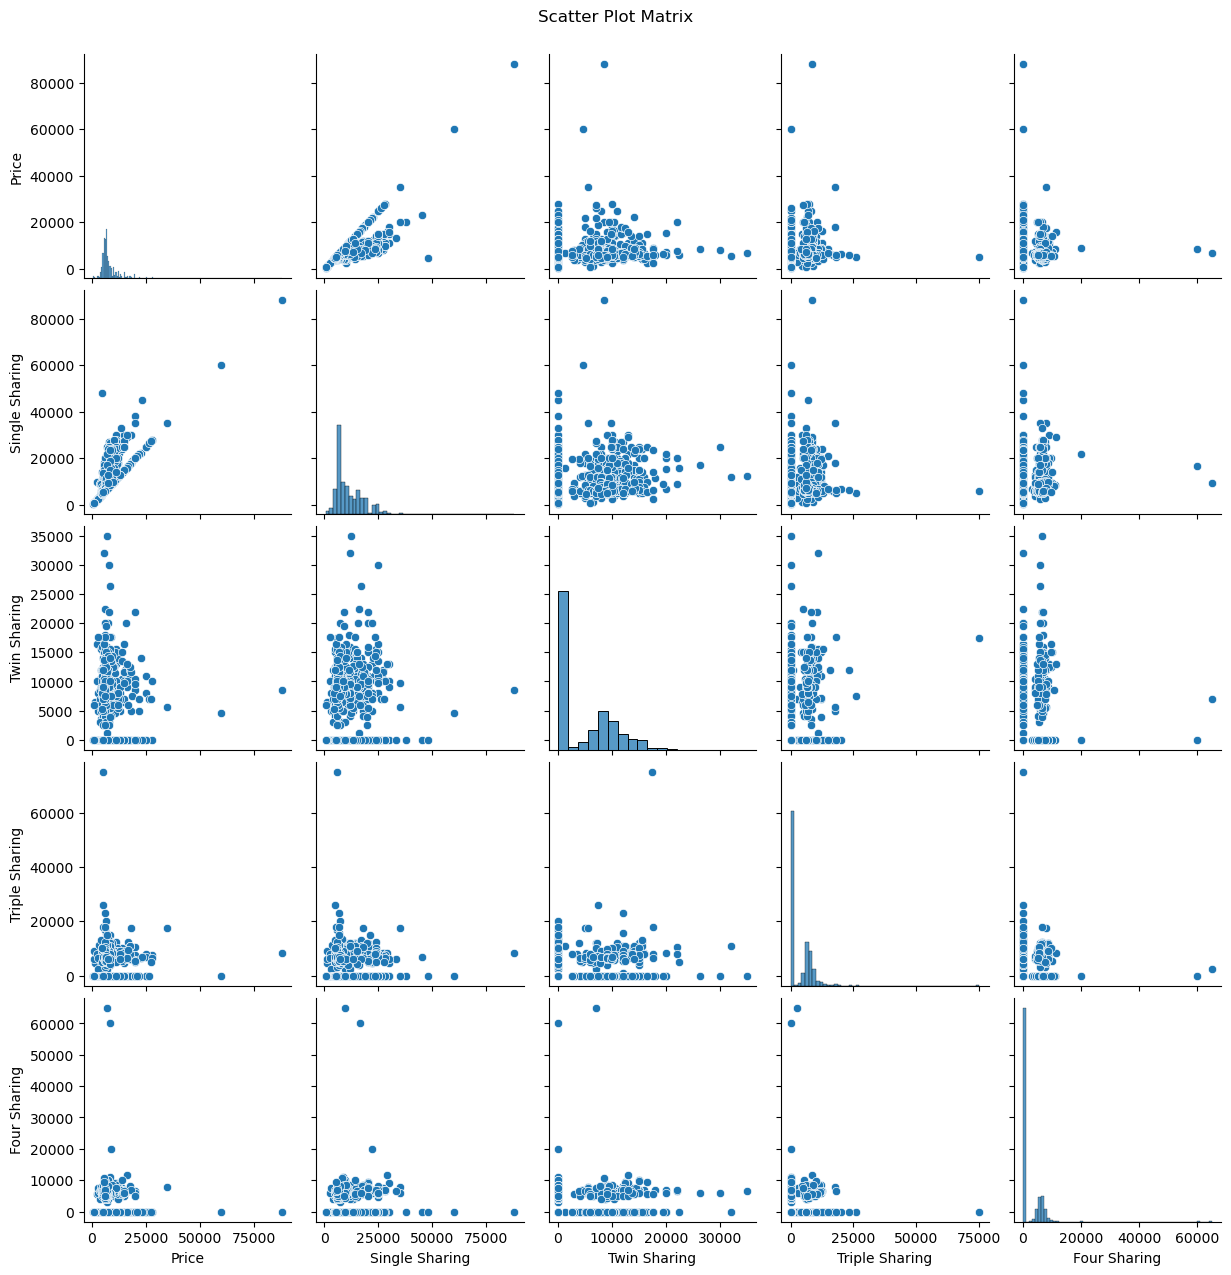

In [115]:
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

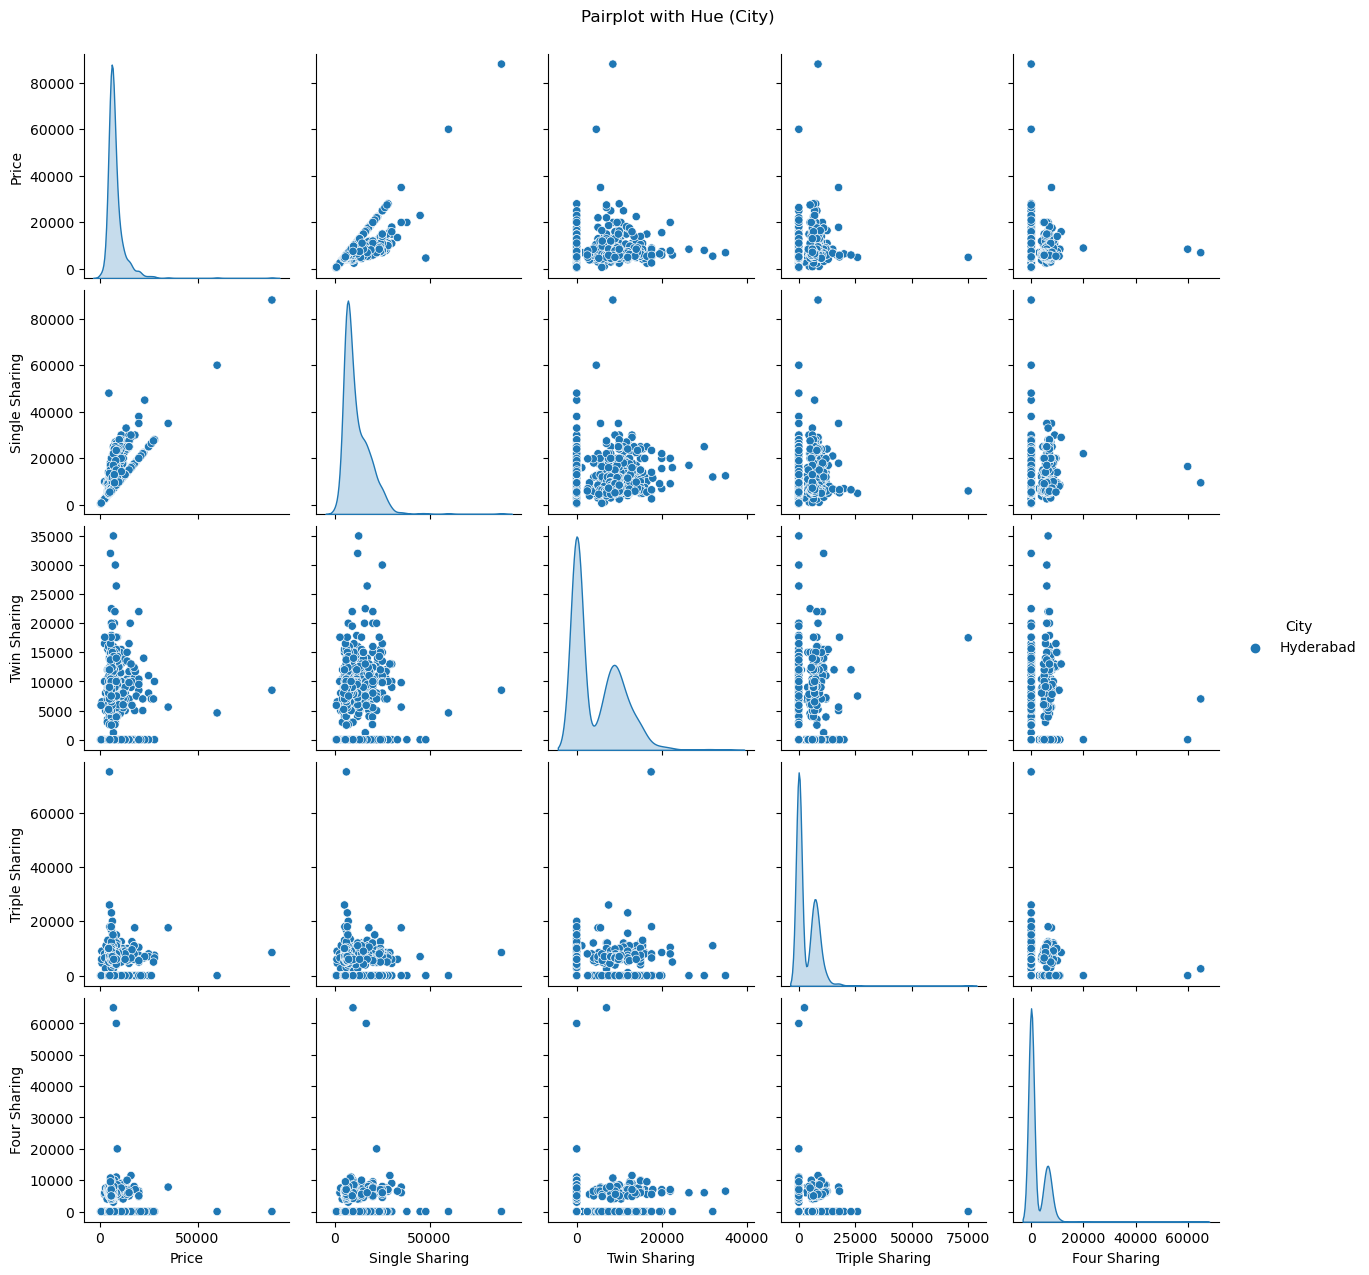

In [116]:
df['City'] = ['Hyderabad'] * len(df)
sns.pairplot(df, hue='City')
plt.suptitle('Pairplot with Hue (City)', y=1.02)
plt.show()

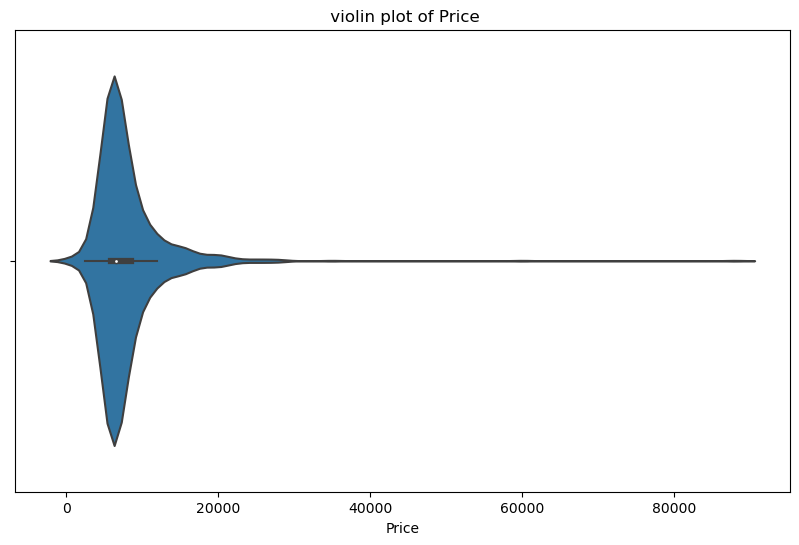

In [117]:
plt.figure(figsize=(10,6))
sns.violinplot(x ="Price", data = df)
plt.title(" violin plot of Price")
plt.show()